In [2]:
# 导入必要的库
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据集
file_path = 'dataset/NBA_Season_Stats.csv'
data = pd.read_csv(file_path)

# 显示数据集的前几行
# data.head()


In [3]:
# # 检查数据集的缺失值情况
# data.info()
# 
# # 检查每列的缺失值数量
# data.isnull().sum()


In [3]:
# 数据清理：去除无关列并处理缺失值
data_cleaned = data.drop(columns=['Player', 'Tm', 'Year'])
data_cleaned = data_cleaned.dropna()

# 特征工程：创建PTS_per_min特征
data_cleaned['PTS_per_min'] = data_cleaned['PTS'] / data_cleaned['MP']

# 选择用于分类的特征（根据重要性排名）
selected_features = ['AST', 'TRB', 'MP', 'DRB', 'ORB', 'STL', 'BLK', 'FG%', 'eFG%', 'PF', 'TOV', 'PTS', '2P%', 'G', 'PTS_per_min', '3P%', 'Age', 'FT%']

# 标准化特征数据
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned[selected_features])

# 将标准化的数据转换为DataFrame格式
data_standardized_df = pd.DataFrame(data_standardized, columns=selected_features)

# 添加标签列
data_standardized_df['Pos'] = data_cleaned['Pos'].values

# 获取标签列
le = LabelEncoder()
data_standardized_df['Pos'] = le.fit_transform(data_cleaned['Pos'].values)

# 显示处理后的数据集的前几行
# data_standardized_df.head()


In [4]:
# 编码标签
le = LabelEncoder()
data_standardized_df['Pos'] = le.fit_transform(data_cleaned['Pos'].values)

# 特征和标签
X = data_standardized_df.drop(['Pos'], axis=1)
y = data_standardized_df['Pos']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((11948, 18), (2987, 18), (11948,), (2987,))

In [6]:
# 使用C4.5算法训练模型
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 预测测试集的结果
y_pred = model.predict(X_test)

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 显示评估结果
print('Accuracy:', accuracy)
print('Classification Report:\n', report)


Accuracy: 0.5711416136591898
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.50      0.52       393
           1       0.50      0.56      0.53       605
           2       0.79      0.82      0.80       713
           3       0.49      0.43      0.46       643
           4       0.48      0.50      0.49       633

    accuracy                           0.57      2987
   macro avg       0.56      0.56      0.56      2987
weighted avg       0.57      0.57      0.57      2987



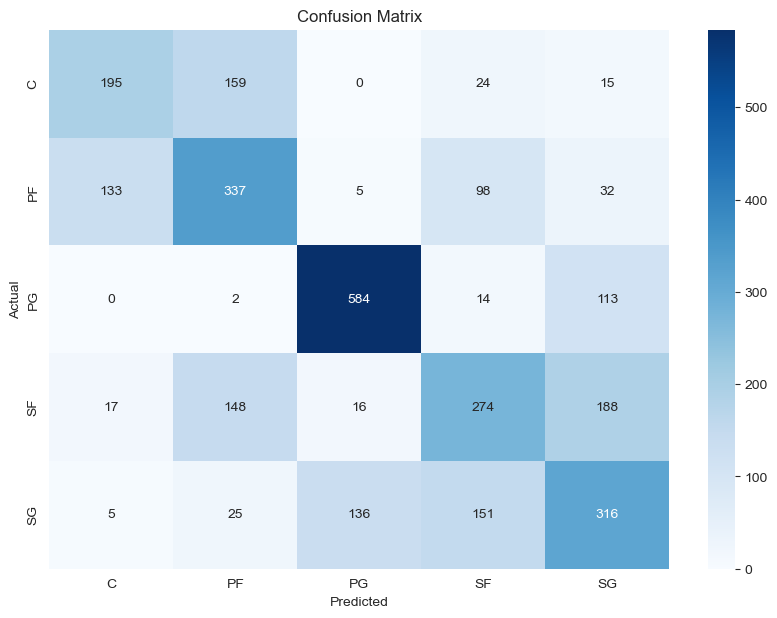

In [7]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
